# Data Cleaning and Preprocessing

In [ ]:
#Remove Stopwords

def remove_stopwords(sentence):
    """
    Removes a list of stopwords

    Args:
        sentence (string): sentence to remove the stopwords from

    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after","ago" ,"again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence
import pandas as pd
df = pd.read_csv("Disaster_dataset.csv")
df['Tweet']=df['Tweet'].apply(lambda x:remove_stopwords(x))

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet from NLTK
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')


# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmi(sentence):


    # Tokenize the sentence into individual words
    words = nltk.word_tokenize(sentence)

    # Lemmatize each word to its base form
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the lemmatized words back into a sentence
    lemmatized_sentence = " ".join(lemmatized_words)

    # Print the original and lemmatized sentences

    return  lemmatized_sentence
df['Tweet']=df['Tweet'].apply(lambda x:lemmi(x))
df["Tweet"]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0       earthquake preparedness never stop young stude...
1       uae two aid plane carrying 553 ton relief item...
2       football fan besiktas throw toy pitch honour t...
3       usgs report m085 earthquake 3km w anderson spr...
4       haytap turkey gt small miracle 21st day turkey...
                              ...                        
5540    _globalcrisis_ destruction colossal going get ...
5541    climatecerberus damage still chance must use u...
5542    _globalcrisis_ climatecerberus almost off chai...
5543    chaosdujour comey fbi spaghettimodel senstivet...
5544    warning florida will suffer direct hit categor...
Name: Tweet, Length: 5545, dtype: object

# Encoded Label

In [ ]:
#In this step we are Encoding Our target variable which is Theme as we can see numbers from 0-6 have been assinged to every unique label
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Label=df['Label']
Label=np.array(Label).reshape(-1,1)


df['encoded_labels']=''
enc=le.fit_transform(Label)

df['encoded_labels']=enc
df.head()

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Tweet,Label,encoded_labels
0,earthquake preparedness never stop young stude...,Earthquake,1
1,uae two aid plane carrying 553 ton relief item...,Earthquake,1
2,football fan besiktas throw toy pitch honour t...,Earthquake,1
3,usgs report m085 earthquake 3km w anderson spr...,Earthquake,1
4,haytap turkey gt small miracle 21st day turkey...,Earthquake,1


# Tokenization

In [ ]:
# Parameters

vocab_size = 100000
max_length = 120
embedding_dim = 16
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(df["Tweet"])
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(df["Tweet"])
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting into Train, Test and Validation Data
X_train, X_test, y_train, y_test = train_test_split(padded, df["encoded_labels"], test_size=0.2, random_state=500)

In [ ]:
#Preparitng our target Variables for the model accordingly
from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical cause error use keras with tensorflow

y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [ ]:
#Categorical Crossentropy #can we use nltk token

# GRU

In [ ]:
import tensorflow as tf

# Build the model
model_one = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(4, activation='softmax')
])





In [ ]:
import tensorflow.keras.backend as K

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + K.epsilon()))
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      F1Score(name='f1_score')
]
model_one.compile(optimizer='adam',loss='categorical_crossentropy',metrics=METRICS)

# Print the model summary
model_one.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           1600000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 120, 512)         420864    
 nal)                                                            
                                                                 
 global_average_pooling1d_1   (None, 512)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                

In [ ]:
history_one=model_one.fit(X_train,y_train,epochs=20,batch_size=4)

Epoch 1/20
1109/1109 [==============================] - 31s 19ms/step - loss: 1.1159 - accuracy: 0.4560 - precision: 0.9547 - recall: 0.1997 - f1_score: 0.3304
Epoch 2/20
   9/1109 [..............................] - ETA: 17s - loss: 0.9519 - accuracy: 0.5000 - precision: 1.0000 - recall: 0.3333 - f1_score: 0.5000

/usr/local/lib/python3.9/dist-packages/keras/engine/training.py:2416: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1109/1109 [==============================] - 16s 15ms/step - loss: 0.8864 - accuracy: 0.5503 - precision: 0.9260 - recall: 0.3386 - f1_score: 0.4959
Epoch 3/20
1109/1109 [==============================] - 16s 14ms/step - loss: 0.7528 - accuracy: 0.6041 - precision: 0.9527 - recall: 0.3814 - f1_score: 0.5448
Epoch 4/20
1109/1109 [==============================] - 15s 14ms/step - loss: 0.5595 - accuracy: 0.7390 - precision: 0.8812 - recall: 0.5985 - f1_score: 0.7128
Epoch 5/20
1109/1109 [==============================] - 16s 15ms/step - loss: 0.4610 - accuracy: 0.7926 - precision: 0.8537 - recall: 0.7128 - f1_score: 0.7769
Epoch 6/20
1109/1109 [==============================] - 15s 14ms/step - loss: 0.4406 - accuracy: 0.8695 - precision: 0.8851 - recall: 0.8442 - f1_score: 0.8642
Epoch 7/20
1109/1109 [==============================] - 15s 14ms/step - loss: 0.2276 - accuracy: 0.9270 - precision: 0.9368 - recall: 0.9123 - f1_score: 0.9244
Epoch 8/20
1109/1109 [=============================

In [ ]:
prediction_one=model_one.evaluate(X_test,y_test)



35/35 [==============================] - 0s 12ms/step - loss: 1.5281 - accuracy: 0.8359 - precision: 0.8388 - recall: 0.8350 - f1_score: 0.8369


# LSTM

In [ ]:
import tensorflow as tf

# Build the model
model_two = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(4, activation='softmax')
])



In [ ]:
import tensorflow.keras.backend as K

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + K.epsilon()))
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      F1Score(name='f1_score')
]
model_two.compile(optimizer='adam',loss='categorical_crossentropy',metrics=METRICS)

# Print the model summary
model_two.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           1600000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 120, 512)         559104    
 nal)                                                            
                                                                 
 global_average_pooling1d_2   (None, 512)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                

In [ ]:
history_2=model_two.fit(X_train,y_train,epochs=20,batch_size=4,validation_data=(X_test,y_test))

Epoch 1/20
   7/1109 [..............................] - ETA: 30s - loss: 0.8434 - accuracy: 0.5357 - precision: 1.0000 - recall: 0.3929 - f1_score: 0.5641

/usr/local/lib/python3.9/dist-packages/keras/engine/training.py:2416: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1109/1109 [==============================] - 20s 18ms/step - loss: 0.8051 - accuracy: 0.5875 - precision: 0.9863 - recall: 0.3569 - f1_score: 0.5241 - val_loss: 1.0159 - val_accuracy: 0.5987 - val_precision: 0.9169 - val_recall: 0.3481 - val_f1_score: 0.5046
Epoch 2/20
1109/1109 [==============================] - 19s 17ms/step - loss: 0.7741 - accuracy: 0.5965 - precision: 0.9853 - recall: 0.3625 - f1_score: 0.5300 - val_loss: 1.0092 - val_accuracy: 0.5879 - val_precision: 0.9252 - val_recall: 0.3345 - val_f1_score: 0.4914
Epoch 3/20
1109/1109 [==============================] - 20s 18ms/step - loss: 0.7881 - accuracy: 0.5861 - precision: 0.9509 - recall: 0.3625 - f1_score: 0.5249 - val_loss: 1.0770 - val_accuracy: 0.5834 - val_precision: 0.8668 - val_recall: 0.3463 - val_f1_score: 0.4948
Epoch 4/20
1109/1109 [==============================] - 19s 18ms/step - loss: 0.7258 - accuracy: 0.5983 - precision: 0.9921 - recall: 0.3665 - f1_score: 0.5353 - val_loss: 1.1344 - val_accuracy: 0.5852

In [ ]:
prediction_two=model_two.evaluate(X_test,y_test)


35/35 [==============================] - 0s 12ms/step - loss: 1.0784 - accuracy: 0.8350 - precision: 0.8380 - recall: 0.8350 - f1_score: 0.8365


## Comparision OF MODEL On Test Data Performance

**PRECISION**

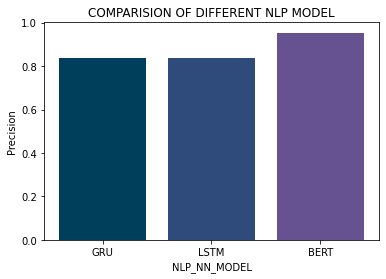

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
x = ['GRU', 'LSTM', 'BERT']
y = [0.8388,0.8380, 0.9533]

# Set the colors for the bars
colors = ['#003f5c', '#2f4b7c', '#665191']

# Create a bar chart
plt.bar(x, y, color=colors)

# Add labels and title
plt.xlabel("NLP_NN_MODEL")
plt.ylabel("Precision")
plt.title("COMPARISION OF DIFFERENT NLP MODEL")

# Show the plot
plt.show()

RECALL

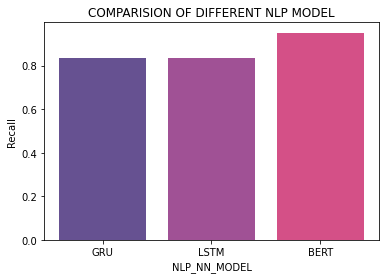

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
x = ['GRU', 'LSTM', 'BERT']
y = [0.8350, 0.8350,0.9510]

# Set the colors for the bars
colors = ['#665191', '#a05195', '#d45087']

# Create a bar chart
plt.bar(x, y, color=colors)

# Add labels and title
plt.xlabel("NLP_NN_MODEL")
plt.ylabel("Recall")
plt.title("COMPARISION OF DIFFERENT NLP MODEL")

# Show the plot
plt.show()

ACCURACY

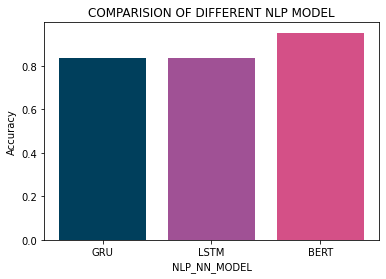

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
x = ['GRU', 'LSTM', 'BERT']
y = [0.8359, 0.8350, 0.9516]

# Set the colors for the bars
colors = ['#003f5c', '#a05195', '#d45087']

# Create a bar chart
plt.bar(x, y, color=colors)

# Add labels and title
plt.xlabel("NLP_NN_MODEL")
plt.ylabel("Accuracy")
plt.title("COMPARISION OF DIFFERENT NLP MODEL")

# Show the plot
plt.show()

F1_SCORE

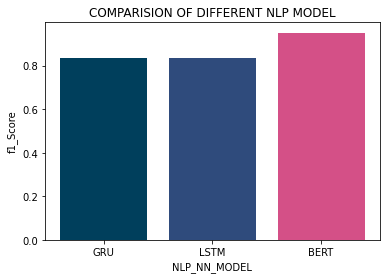

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
x = ['GRU', 'LSTM', 'BERT']
y = [0.8369, 0.8365,0.9512]

# Set the colors for the bars
colors = ['#003f5c', '#2f4b7c', '#d45087']

# Create a bar chart
plt.bar(x, y, color=colors)

# Add labels and title
plt.xlabel("NLP_NN_MODEL")
plt.ylabel("f1_Score")
plt.title("COMPARISION OF DIFFERENT NLP MODEL")

# Show the plot
plt.show()

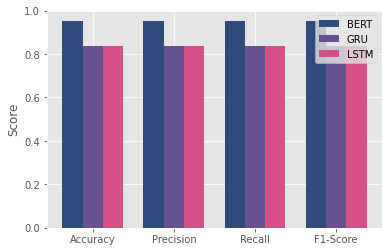

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the precision, recall, F1 score, and accuracy for each model
lstm=[0.8350 , 0.8380 , 0.8350 , 0.8365]
gru=[0.8359 , 0.8388 , 0.8350 , 0.8369]
bert=[0.9516 , 0.9533 , 0.9510 ,0.9521]

# Set up the bar chart
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(labels))
width = 0.25
colors = ['#003f5c', '#2f4b7c', '#665191']
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, bert, width, label='BERT',color='#2f4b7c')
rects2 = ax.bar(x, gru, width, label='GRU',color='#665191')
rects3 = ax.bar(x + width, lstm, width, label='LSTM',color='#d45087')

# Add labels, title, and legend to the plot
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Set the plot style
plt.style.use('ggplot')

# Show the plot
plt.show()


In [ ]:
#it may also be useful to consider metrics such as sensitivity, specificity, and area under the ROC curve, which can capture the trade-off between identifying
# true disasters and avoiding false positives.

In [ ]:
def download_history():
  import pickle
  from google.colab import files

  with open('history_augmented.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history_augmented.pkl')

download_history()

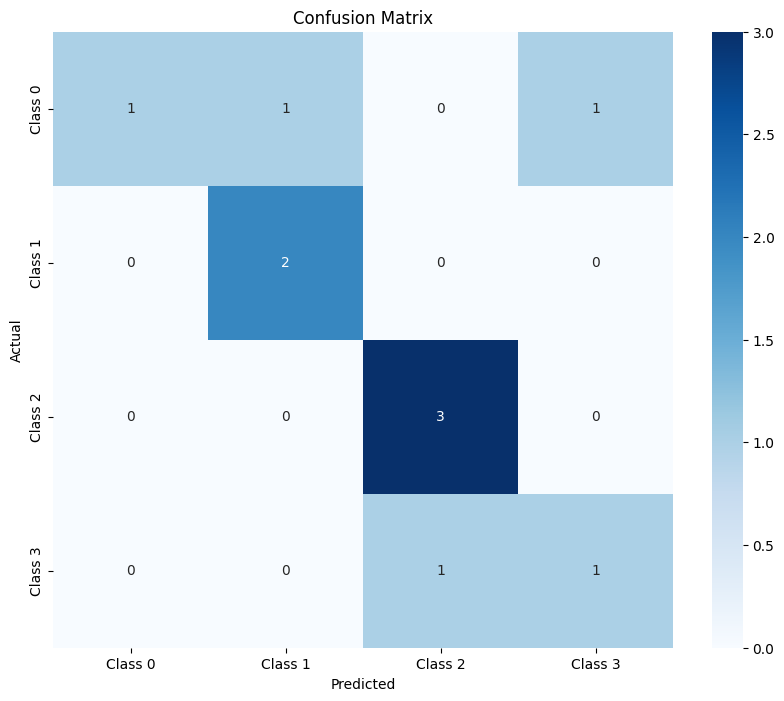

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Example ground truth and predicted labels for 4 classes
true_labels = [0, 1, 2, 3, 1, 0, 2, 2, 3, 0]
predicted_labels = [0, 1, 2, 3, 1, 1, 2, 2, 2, 3]

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Example ground truth and predicted labels for 4 classes
# true_labels=enc
true_labels = [0, 1, 2, 3, 1, 0, 2, 2, 3, 0]
predicted_labels = [0, 1, 2, 3, 1, 1, 2, 2, 2, 3]

# Define class labels
class_labels = ['Accident', 'Earthquake', 'Flood', 'Other Disaster']

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Add correct prediction counts to the diagonal
for i in range(len(class_labels)):
    plt.text(i + 0.5, i + 0.5, f'{cm[i, i]} correct', color='green', ha='center', va='center', fontweight='bold')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
